In [7]:
import numpy as np

In [28]:


def dnd_calc(main_die='D20', advantage='None', additional_dice = [], dice_signs = [], DC = 10, modifier=0):
    # different sided dice in DnD
    sides = (4, 6, 8, 10, 12, 20)
    dice = {'D'+ str(n) : n for n in sides} # D20 = 20 sided dice
    side = dice[main_die]
    additional_sides = [dice[label] for label in additional_dice]
    _min = sum([1,] + [a * s if s < 0 else 1 for a, s in zip(additional_sides, dice_signs)])
    _max = sum([side,] + [a if s > 0 else s for a, s in zip(additional_sides, dice_signs)])
    roll_range = np.arange(_min, _max + 1)
    # additional dice subtracted changes the roll_range, but not the shape of the PDF (probability distribution function)
    

    if advantage == 'Advantage':
        probs = np.array([2*(val - 1) + 1 for val in np.arange(1, side + 1)]) # base distribution
    elif advantage == 'Disadvantage':
        probs = np.array([2*(side - val) + 1 for val in np.arange(1, side + 1)])
    else:
        probs = np.ones(side) # all numbers equally probable if no advantage

    for a_side in additional_sides:
        probs = np.convolve(probs, np.ones(a_side),) # convolve the PDFs

    probs = probs / probs.sum()

    x = roll_range + modifier# this deals with the modifier
    return x, probs, DC

In [29]:
main_die='D20'
advantage='None'
additional_dice = ['D4','D4','D20']
dice_signs = [False, False, True]
DC = 10
modifier=0

dnd_calc(main_die=main_die, advantage=advantage, additional_dice = additional_dice, dice_signs = dice_signs, DC = DC, modifier=modifier)

(array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
        38, 39, 40]),
 array([0.00015625, 0.000625  , 0.0015625 , 0.003125  , 0.00515625,
        0.0075    , 0.01      , 0.0125    , 0.015     , 0.0175    ,
        0.02      , 0.0225    , 0.025     , 0.0275    , 0.03      ,
        0.0325    , 0.035     , 0.0375    , 0.04      , 0.0425    ,
        0.0446875 , 0.04625   , 0.046875  , 0.04625   , 0.0446875 ,
        0.0425    , 0.04      , 0.0375    , 0.035     , 0.0325    ,
        0.03      , 0.0275    , 0.025     , 0.0225    , 0.02      ,
        0.0175    , 0.015     , 0.0125    , 0.01      , 0.0075    ,
        0.00515625, 0.003125  , 0.0015625 , 0.000625  , 0.00015625]),
 10)

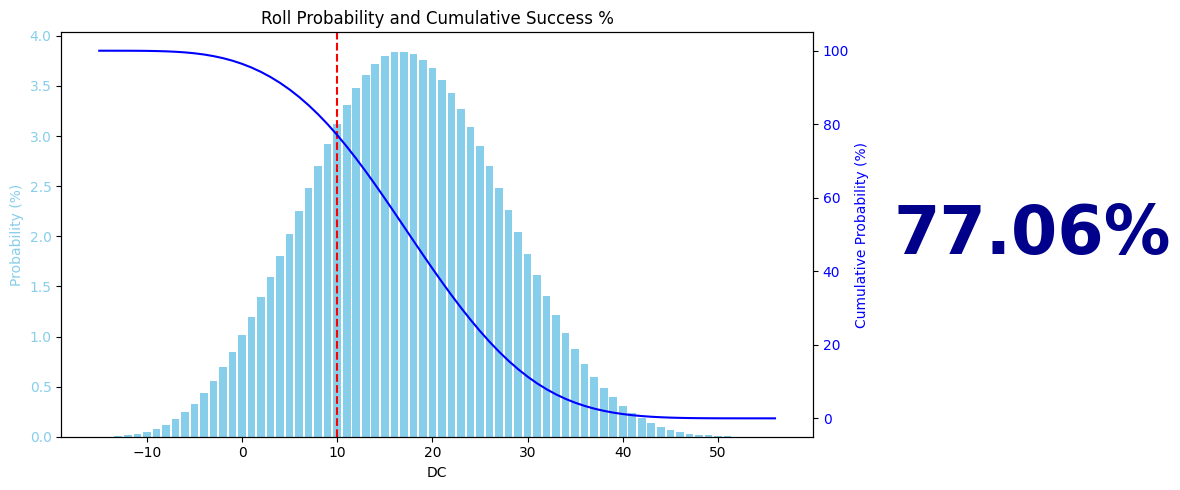

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


main_die='D20'
advantage='Disadvantage'
additional_dice = ['D20','D8','D20','D8']
dice_signs = [-1, 1, 1, 1]
DC = 10
modifier=1


# Assuming you have:
# x: list or array of DC values
# probs: list or array of probabilities (summing to ~1.0)
# DC: the vertical line position
x, probs, DC = dnd_calc(main_die=main_die, advantage=advantage, additional_dice = additional_dice, dice_signs = dice_signs, DC = DC, modifier=modifier)
# Convert probs to numpy array for easier slicing
probs = np.array(probs)

prob_col = 'skyblue'
cum_col = 'blue'
DC_col = 'red'
# Compute cumulative success probabilities (from i to end)
success_percent = [100 * probs[i:].sum() for i in range(len(probs))]
# Final % of success from current DC onward
final_pct = round(100 * (probs * (x >= DC)).sum(), 2)

# Create subplot layout: main plot (left), percentage (right)
fig, (ax1, ax_pct) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [4, 1]})

# Main graph
bar = ax1.bar(x, 100 * probs, color=prob_col, label='Roll Probability')
ax1.set_ylabel('Probability (%)', color=prob_col)
ax1.tick_params(axis='y', labelcolor=prob_col)

ax2 = ax1.twinx()
ax2.plot(x, success_percent, color=cum_col, label='Success %')
ax2.set_ylabel('Cumulative Probability (%)', color=cum_col)
ax2.tick_params(axis='y', labelcolor=cum_col)

ax1.axvline(x=DC, color=DC_col, linestyle='dashed', label='DC Threshold')
ax1.set_xlabel('DC')
ax1.set_title('Roll Probability and Cumulative Success %')

# Hide ticks and spines on right subplot
ax_pct.axis('off')

# Big percentage text
ax_pct.text(0.5, 0.5, f"{final_pct}%", fontsize=48, color='dark'+cum_col, weight='bold', ha='center', va='center')

# Layout
plt.tight_layout()
plt.show()